In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [47]:
results_path = "/Volumes/noamaz/modularity/retina/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

mean_metric_name = "max_performance"
task = "retina"
num_layers = '4'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/{num_layers}_layers/"

In [49]:
csv_name_big = f'dynamic_retina_{num_layers}_layers/2023-08-15-12-10-39_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv'
result_df_big = pd.read_csv(f"{results_path}/{csv_name_big}")

In [50]:
result_df_big_no_outliers = result_df_big[
    result_df_big['mean_performance'].between(result_df_big['mean_performance'].quantile(0.01),
                                              result_df_big['mean_performance'].quantile(0.99))].rename(
    columns={'connectivity_ratio': 'density'}).sort_values('mean_performance', ascending=False)
result_df_big_no_outliers['sum_normalized_motifs_count'] = result_df_big_no_outliers['normalized_motifs_count_0'] + \
                                                           result_df_big_no_outliers['normalized_motifs_count_1'] + \
                                                           result_df_big_no_outliers['normalized_motifs_count_2']

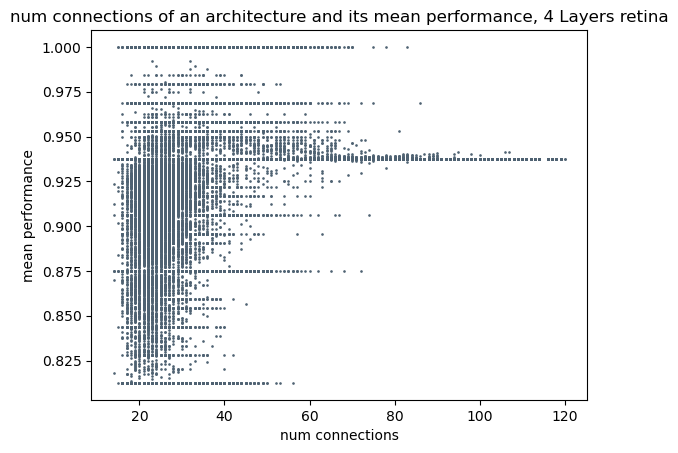

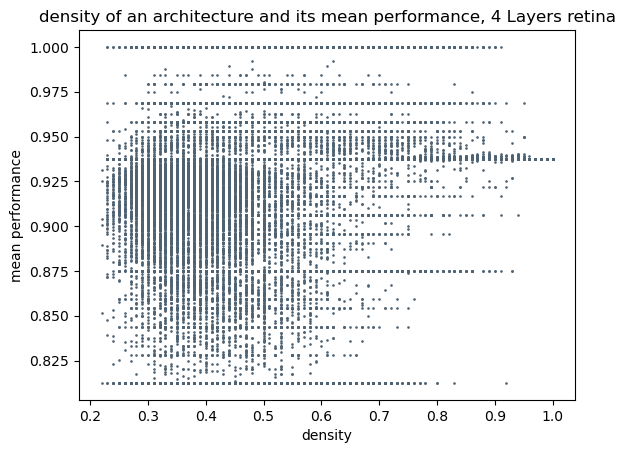

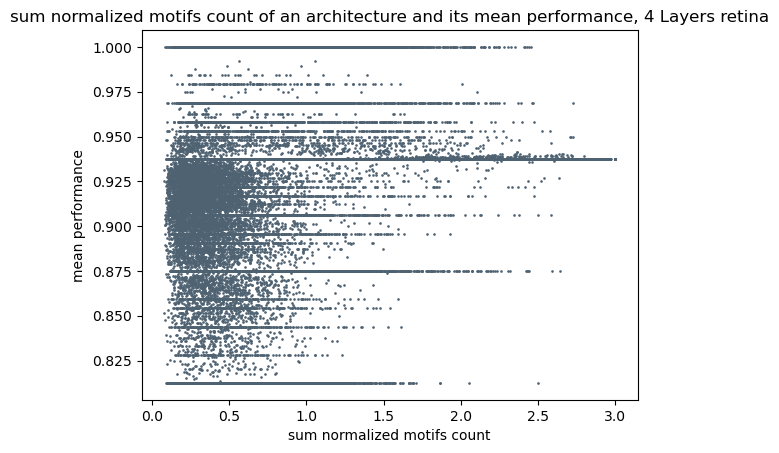

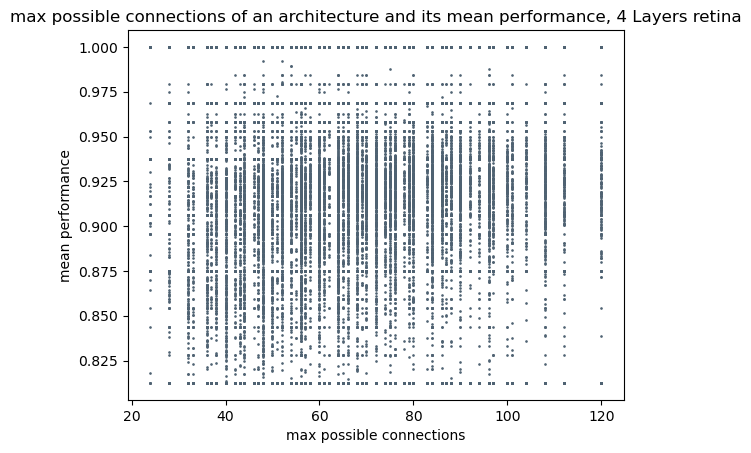

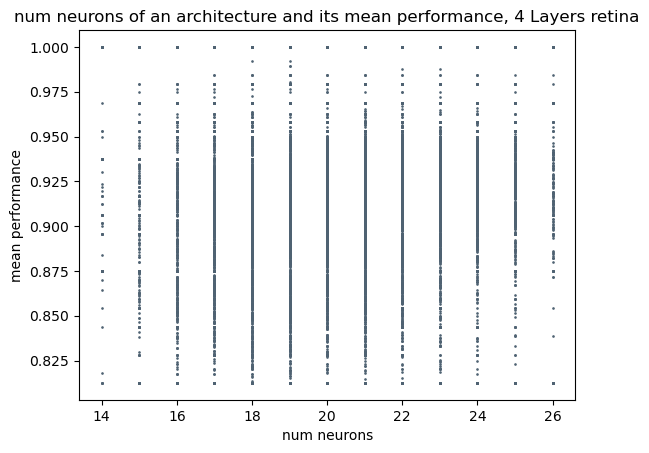

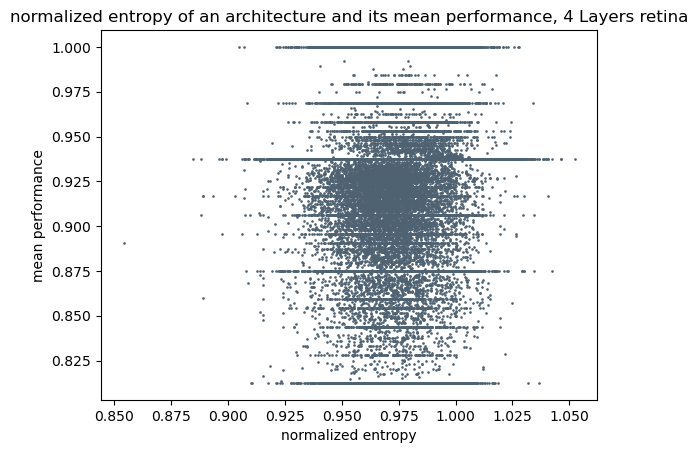

In [51]:
for x_metric_name, y_metric_name in [
    ('num_connections', 'mean_performance'),
    ('density', 'mean_performance'),
    ('sum_normalized_motifs_count', 'mean_performance'),
    ('max_possible_connections', 'mean_performance'),
    ('num_neurons', 'mean_performance'),
    ('normalized_entropy', 'mean_performance'),
]:
    plot_two_metrics(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        result_df=result_df_big_no_outliers,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition='_multi_archs',
        title_addition=f'{num_layers} Layers ',
        mark_size=0.8,
    )

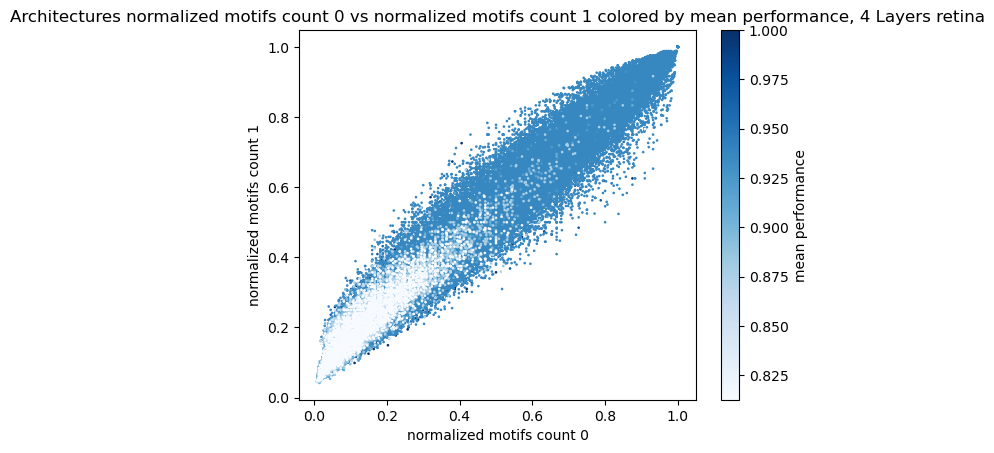

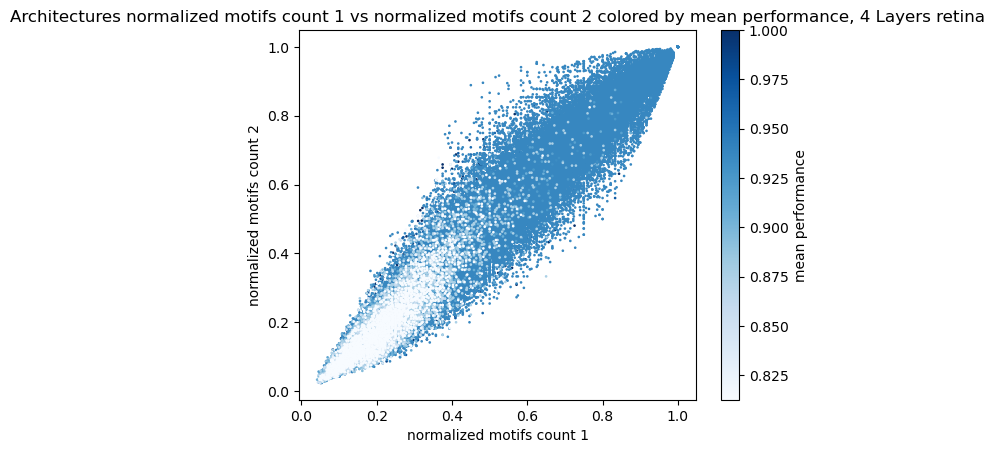

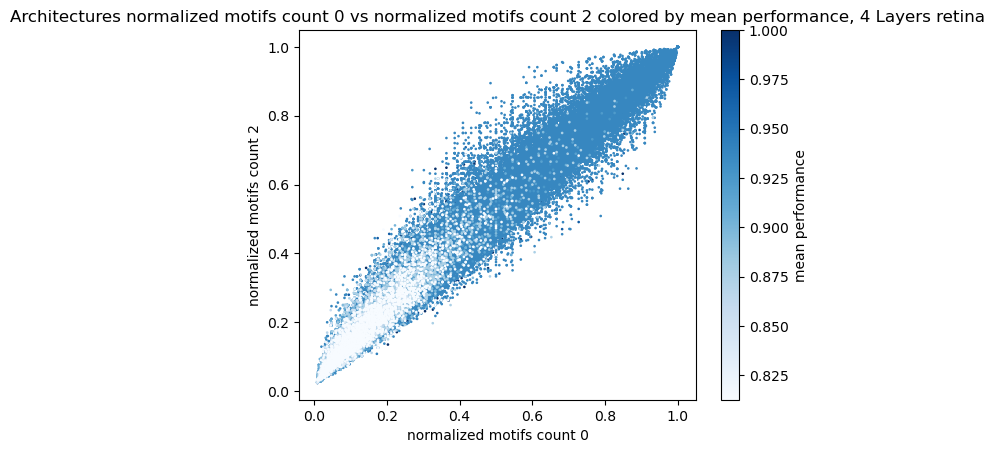

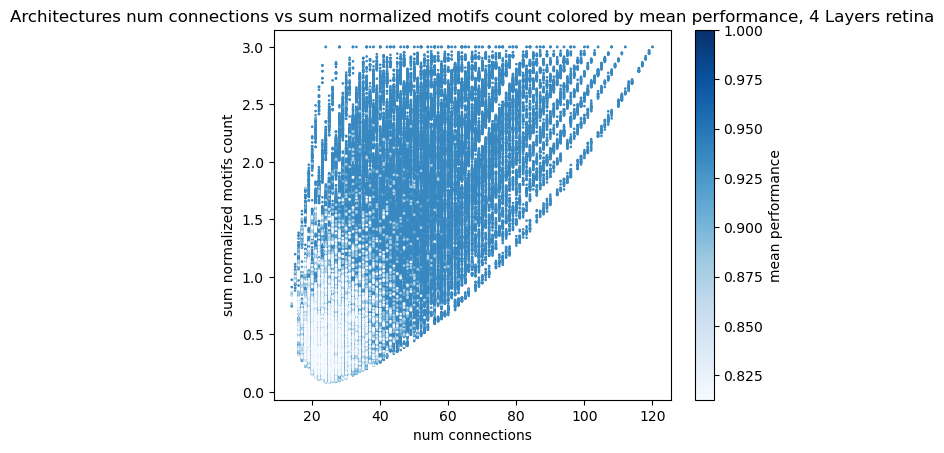

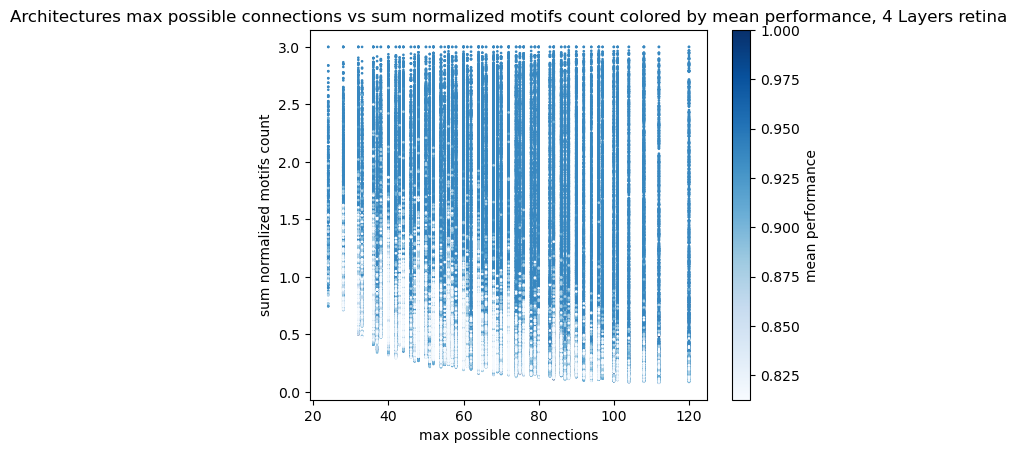

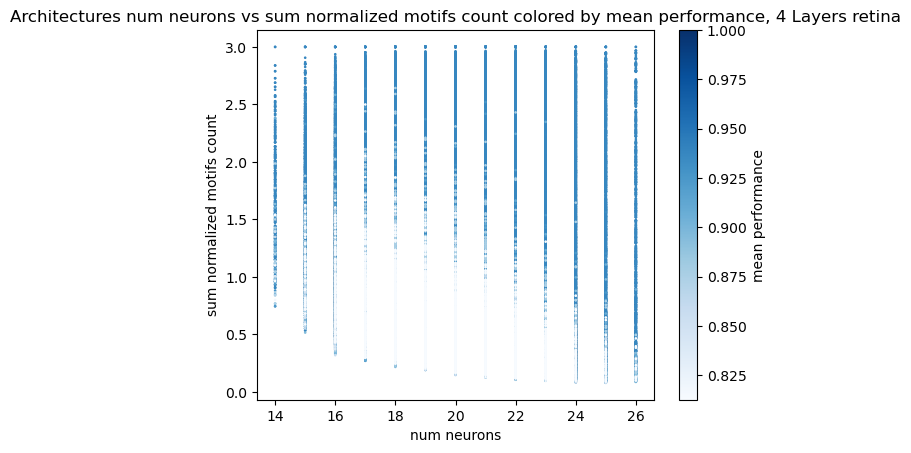

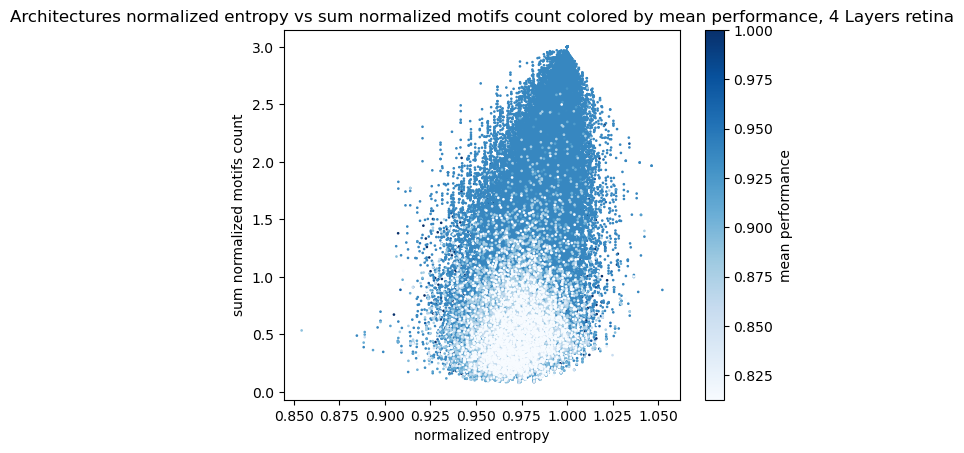

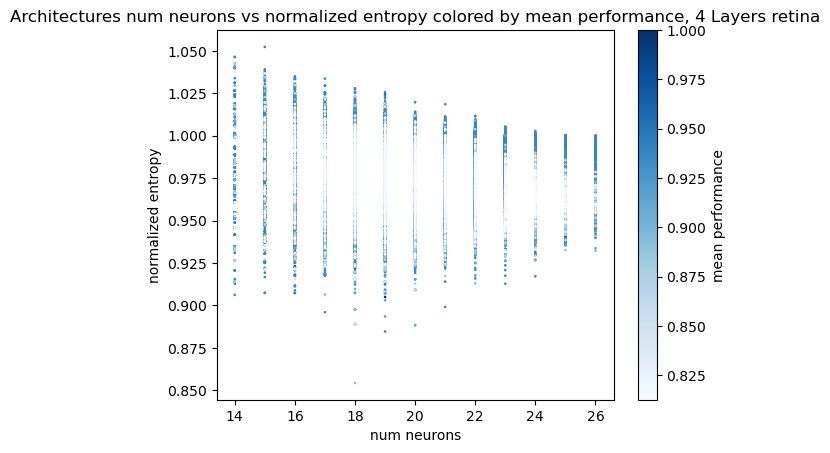

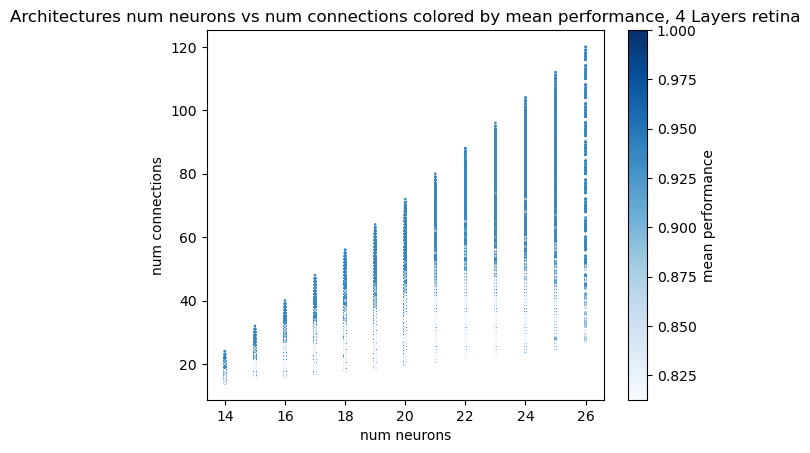

In [52]:

for (x_metric_name, y_metric_name, colored_metric_name) in [
    ('normalized_motifs_count_0', 'normalized_motifs_count_1', 'mean_performance'),
    ('normalized_motifs_count_1', 'normalized_motifs_count_2', 'mean_performance'),
    ('normalized_motifs_count_0', 'normalized_motifs_count_2', 'mean_performance'),
    ('num_connections', 'sum_normalized_motifs_count', 'mean_performance'),
    ('max_possible_connections', 'sum_normalized_motifs_count', 'mean_performance'),
    ('num_neurons', 'sum_normalized_motifs_count', 'mean_performance'),
    ('normalized_entropy', 'sum_normalized_motifs_count', 'mean_performance'),
    ('num_neurons', 'normalized_entropy', 'mean_performance'),
    ('num_neurons', 'num_connections', 'mean_performance'),
]:
    plot_two_metrics_vs_colored_metric(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        colored_metric_name=colored_metric_name,
        result_df=result_df_big_no_outliers,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition='_multi_archs',
        title_addition=f'{num_layers} Layers ',
        mark_size=0.8,
    )

In [53]:
result_df_big_no_outliers.shape

(126928, 30)